## Blinded cameras clustering

Here the dataset is a pandas DataFrame generated from a response.drdf file. 
The file can be found at "/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-GRAIN-CALORIMETRY/data/cube_production/production1/cube_X0_Y0_Z-3/output/response_cut.drdf".

In [1]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import sklearn.metrics as metric

### Read data from pickle format

Compose data array from dataframe column, keeping different cameras in the rows, while columns represent the pixels

In [3]:
#module_path = os.path.abspath(os.path.join('..'))
df = pd.read_pickle("blind_cameras_dataset\\drdf_arrays.pkl")

df2arr = df.pixels.to_numpy()
arr3d = np.stack(df2arr)
data = arr3d.reshape(df2arr.shape[0],32*32)


data array with shape: (46968,)


In [5]:
# NB this os the proof of how the reshape method works!!
# t0 = test[0]
# t1 = test1[0]
# d = np.empty(0)
# for i in range(32):
#     for j in range(32):
#         diff = t0[i,j] - t1[i*32+j]
#         d = np.apltend(d,diff)
        
# print(np.min(d), np.max(d))

### Show distribution of data from the entire file

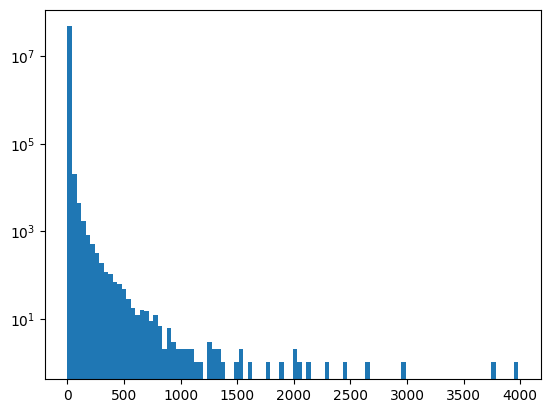

In [8]:
plt.hist(data.reshape(-1,1),100)
plt.yscale('log')

#### Find cameras with an excess of photons *
*NB. this excess must be defined using some algorithm

In [19]:
tw = np.where(data>50)
blind_candidate = np.unique(tw[0])
print('cameras with excess photons: ', blind_candidate.size)
#print(blind_candidate)

cameras with excess photons:  527


### Use the KMean algorithm to clusterise the datasample.
The same data are the processed to check the clusterization.

In [38]:
# Declaring Model
model = KMeans(n_clusters=3)
model1 = KMeans(init="random", n_clusters=3, n_init=20, random_state=0)
model2 = KMeans(init="k-means++", n_clusters=3, n_init=20, random_state=0)
model3 = KMeans(init="k-means++", n_clusters=2, n_init=20, random_state=0)
# Fitting Model
model.fit(data)
model1.fit(data)
model2.fit(data)
model3.fit(data[blind_candidate])

print(np.count_nonzero(model1.labels_ == 0), np.count_nonzero(model1.labels_ == 1), np.count_nonzero(model1.labels_ == 2))
print(np.count_nonzero(model2.labels_ == 0), np.count_nonzero(model2.labels_ == 1), np.count_nonzero(model2.labels_ == 2))
print(np.count_nonzero(model3.labels_ == 0), np.count_nonzero(model3.labels_ == 1), np.count_nonzero(model3.labels_ == 2))#, np.count_nonzero(model3.labels_ == 3), np.count_nonzero(model3.labels_ == 4))

46474 20 474
46476 19 473
19 508 0


In [11]:
# Prediction on the entire data
label = model.predict(data)
blind_predicted = np.where(label == 1)

print('not blind :',np.count_nonzero(label == 0),'over',label.size)
print('predicted blind :',np.count_nonzero(label == 1),'over',label.size)
#print(blind_predicted)

blind_in_common = np.intersect1d(blind_candidate, blind_predicted[0])
print('common blind =', blind_in_common.size,'out of',blind_predicted[0].size, 'predicted.\nCandidates were',blind_candidate.size)

# Find which of the predicted bind_cameras is not in the blind_candidate array i.e. probaly is a false positive
blind_not_in_common = np.setdiff1d(blind_predicted[0], blind_in_common, assume_unique=True) #returns the value in arr1 which are not in arr2
print('not in common :',blind_not_in_common)

not blind : 46550 over 46968
predicted blind : 402 over 46968
common blind = 228 out of 402 predicted.
Candidates were 527
not in common : [   17   245   397   701   929  1233  1385  1461  1537  1689  2525  2829
  3285  3665  4015  4273  5413  5464  5717  5793  5869  6477  7131  7541
  8073  8301  8377  8528  8580  8909  9745  9821  9973 10125 10961 11037
 11616 12177 12405 12785 13165 13241 13317 13621 13697 13925 14001 14077
 14609 14989 15065 15141 15292 15294 15298 15673 16357 16509 16661 16813
 17117 17421 17878 18333 19169 19671 19701 19860 20005 20081 20233 20537
 20689 21449 21753 21829 21981 22361 22631 22960 22987 23045 23091 23653
 24565 25781 25857 26237 27301 27377 27453 27681 27909 28061 28821 28897
 29125 29353 29808 29809 29854 30189 30614 30949 30996 31482 31524 31557
 31633 31785 32013 32241 32393 32697 32773 32849 33153 33579 33609 34065
 34673 34901 35205 35250 35509 35585 35888 35930 36193 36649 37561 37637
 37713 38088 38092 38093 38138 38169 38777 39000 39003 390

common blind = 271 out of 492 predicted.
Candidates were 527
not in common : [   17   245   397   701   929  1233  1385  1461  1537  1689  2525  2829
  3285  3325  3665  3969  4015  4273  4729  5261  5413  5464  5717  5793
  5869  6477  7085  7131  7160  7541  8073  8301  8377  8524  8528  8580
  8909  9593  9745  9821  9973 10125 10961 11037 11616 11797 12177 12405
 12785 13165 13241 13317 13621 13697 13925 14001 14077 14153 14609 14837
 14989 15065 15141 15292 15294 15298 15345 15673 16357 16509 16661 16813
 17117 17421 17649 17878 18257 18333 18713 19169 19397 19671 19701 19860
 20005 20081 20233 20537 20689 21449 21753 21829 21981 22361 22407 22631
 22960 22965 22987 23045 23091 23092 23653 24565 25705 25781 25857 26161
 26237 26845 27301 27377 27453 27681 27909 28061 28593 28821 28897 29125
 29353 29808 29809 29854 30189 30614 30949 30996 31482 31524 31528 31557
 31633 31785 32013 32241 32393 32697 32773 32849 33153 33521 33533 33579
 33609 34065 34521 34673 34901 35205 35250 3543

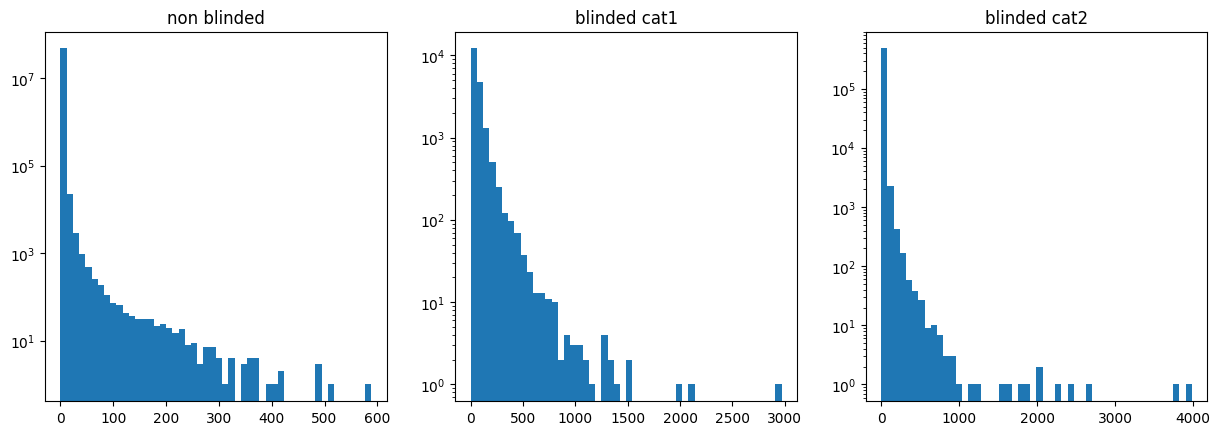

In [12]:
lb2 = model2.predict(data)
bl2 = np.where((lb2 == 1) | (lb2 == 2))
blind_in_common2 = np.intersect1d(blind_candidate, bl2[0])
print('common blind =', blind_in_common2.size,'out of',bl2[0].size, 'predicted.\nCandidates were',blind_candidate.size)
blind_not_in_common2 = np.setdiff1d(bl2[0], blind_in_common2, assume_unique=True) #returns the value in arr1 which are not in arr2
print('not in common :',blind_not_in_common2)
blind_in_common_excluded2 = np.intersect1d(blind_candidate, np.where(lb2 == 0))
print('blinded exlcuded :', len(blind_in_common_excluded2))
print('blinded excluded :',blind_in_common_excluded2)

# plot photon hit distribution of cluster 0,1,2 separately
fig, ax = plt.subplots(1,3)

ax[0].hist(data[np.where(lb2 == 0)[0]].reshape(-1,1),50)
ax [0].set_yscale('log')
ax[0].set_title('non blinded')

ax[1].hist(data[np.where(lb2 == 1)[0]].reshape(-1,1),50)
ax [1].set_yscale('log')
ax[1].set_title('blinded cat1')

ax[2].hist(data[np.where(lb2 == 2)[0]].reshape(-1,1),50)
ax [2].set_yscale('log')
ax[2].set_title('blinded cat2')

fig.set_figwidth(15)

common blind = 508 out of 508 predicted.
Candidates were 527
not in common : []


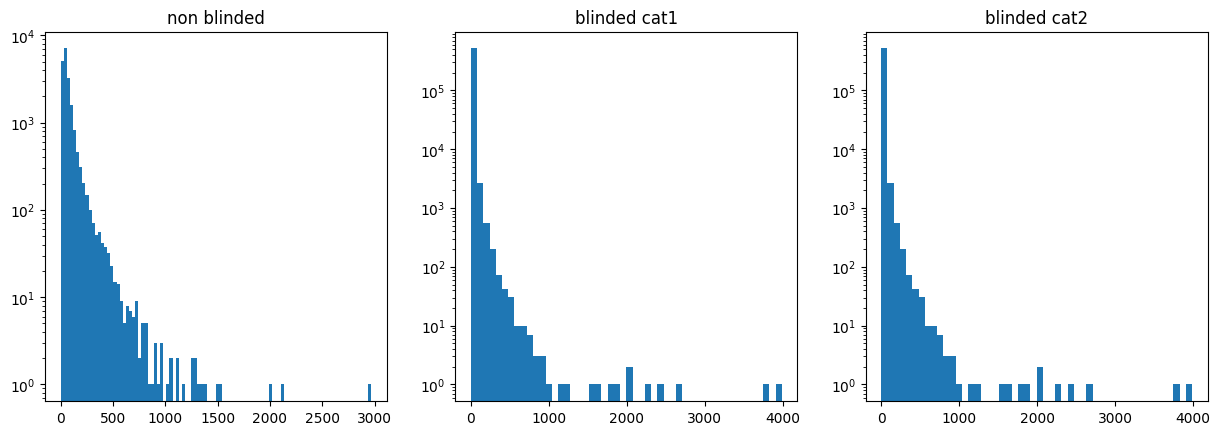

In [39]:
lb3 = model3.predict(data[blind_candidate])
bl3 = np.where(lb3 == 1)
#bl3 = np.where((lb3 == 1) | (lb3 == 2) | (lb3 == 3) | (lb3 == 4))
blind_in_common3 = np.intersect1d(blind_candidate, blind_candidate[bl3[0]])
#blind_in_common3 = np.intersect1d(blind_candidate, bl3[0])
print('common blind =', blind_in_common3.size,'out of',bl3[0].size, 'predicted.\nCandidates were',blind_candidate.size)
blind_not_in_common3 = np.setdiff1d(blind_candidate[bl3[0]], blind_in_common3, assume_unique=True)
#blind_not_in_common3 = np.setdiff1d(bl3[0], blind_in_common3, assume_unique=True) #returns the value in arr1 which are not in arr2
print('not in common :',blind_not_in_common3)

# plot photon hit distribution of cluster 0,1,2 separately
fig, ax = plt.subplots(1,3)

#ax[0].hist(data[np.where(lb3 == 0)[0]].reshape(-1,1),100)
ax[0].hist(data[blind_candidate[np.where(lb3 == 0)[0]]].reshape(-1,1),100)
ax [0].set_yscale('log')
ax[0].set_title('non blinded')

#ax[1].hist(data[np.where(lb3 == 1)[0]].reshape(-1,1),50)
ax[1].hist(data[blind_candidate[np.where(lb3 == 1)[0]]].reshape(-1,1),50)
ax [1].set_yscale('log')
ax[1].set_title('blinded cat1')

#ax[2].hist(data[np.where(lb3 == 2)[0]].reshape(-1,1),50)
ax[2].hist(data[blind_candidate[bl3[0]]].reshape(-1,1),50)
ax [2].set_yscale('log')
ax[2].set_title('blinded cat2')

fig.set_figwidth(15)

In [40]:
blind_candidate[np.where(lb3 == 0)[0]]

array([  853,  8529,  8575, 10171, 12253, 13971, 15339, 17695, 19367,
       29855, 32059, 33199, 35935, 38139, 39051, 39127, 39659, 39765,
       42015], dtype=int64)

### Plot photon distribution for 1 camera

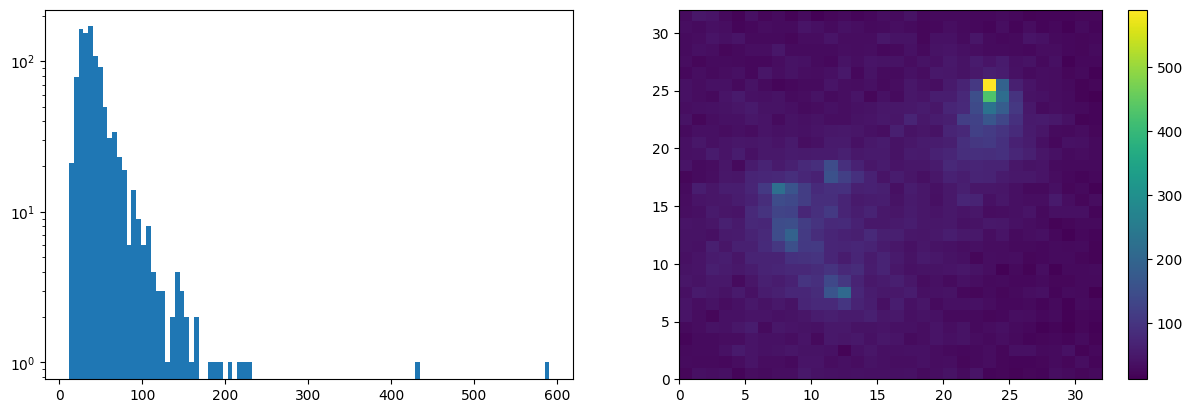

In [44]:
data_num = 42015

fig, ax = plt.subplots(1,2)
ax[0].hist(data[data_num],100)
ax[0].set_yscale('log')

#camera = np.reshape(df.iloc[162].pixels, (32,32))
cam = ax[1].pcolormesh(arr3d[data_num])
plt.colorbar(cam)

fig.set_figwidth(15)

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(projection='3d')
# for px in range(32):
#     for py in range(32):
#         z = data[data_num][px*32+py]
#         ax1.scatter(px,py,z)

# plt.show()

### save cameras to pdf

In [16]:
write_pdf = False
if bl2[0].size < 1000 :
    if write_pdf: 
        pdf = PdfPages('blinded_2.pdf')
        for num in bl2[0]:
            fig = plt.figure()
            cam = plt.pcolormesh(arr3d[num])
            plt.colorbar(cam)
            plt.title('cam-'+str(num))
            pdf.savefig(fig)
            plt.close()
pdf.close()

In [ ]:
write_pdf = False
n = 0
if (bl2[0].size < 1000) & (write_pdf) :
    if n < 7: 
        pdf = PdfPages('blinded_2.pdf')
        for num in bl2[0]:
            fig = plt.figure()
            cam = plt.pcolormesh(arr3d[num])
            plt.colorbar(cam)
            plt.title('cam-'+str(num))
            pdf.savefig(fig)
            plt.close()
pdf.close()

c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


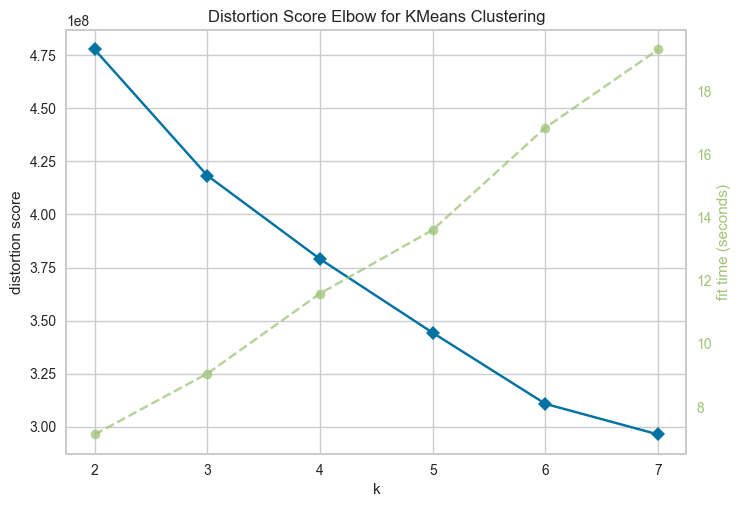

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
test_model = KMeans()
visualizer = KElbowVisualizer(model,metric='calinski_harabasz', timings=False, k=(2,8))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()  